# BANK CUSTOMER CHURN PREDICTION SYSTEM

# Introduction
Customer Churn prediction means knowing which customers are likely to leave or unsubscribe from your service. For many companies, this is an important prediction. This is because acquiring new customers often costs more than retaining existing ones. Once you’ve identified customers at risk of churn, you need to know exactly what marketing efforts you should make with each customer to maximize their likelihood of staying.

Customers have different behaviors and preferences, and reasons for cancelling their subscriptions. Therefore, it is important to actively communicate with each of them to keep them on your customer list. You need to know which marketing activities are most effective for individual customers and when they are most effective.

# How does Customer Churn Prediction Work?
We first have to do some Exploratory Data Analysis in the Dataset, then fit the dataset into Machine Learning Classification Algorithm and choose the best Algorithm for the Bank Customer Churn Dataset.

# About Dataset

This dataset is for ABC Multistate bank with following columns:

customer_id, unused variable.

credit_score, used as input.

country, used as input.

gender, used as input.

age, used as input.

tenure, used as input.

balance, used as input.

products_number, used as input.

credit_card, used as input.

active_member, used as input.

estimated_salary, used as input.

churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Stastics
from scipy import stats as st
import pylab

# Warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [87]:
df=pd.read_csv("Bank Customer Churn Prediction.csv")

In [88]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [90]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [91]:
df.shape

(10000, 12)

In [92]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [93]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Exploratory Data Analysis

In [94]:
df.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

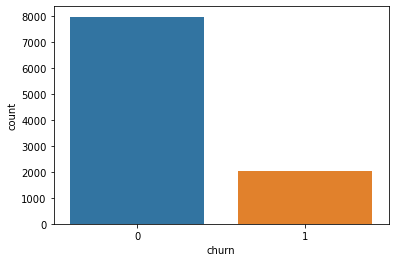

In [95]:
sns.countplot(df['churn'],data=df)

In [96]:
# changing country as 0,1,2
df['country'].replace({'Germany':0,'France':1,'Spain':2},inplace=True)

In [97]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,1,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,1,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,0,Male,42,3,75075.31,2,1,0,92888.52,1


In [98]:
df['gender'].replace({'Female':0,'Male':1},inplace=True)

In [99]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,0,1,42,3,75075.31,2,1,0,92888.52,1


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int64  
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [101]:
df.drop(columns=['customer_id'],inplace=True)

In [102]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,0,1,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot:xlabel='gender', ylabel='count'>

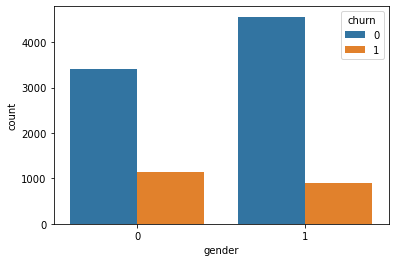

In [103]:
sns.countplot(df['gender'],hue='churn',data=df)

<AxesSubplot:xlabel='tenure', ylabel='count'>

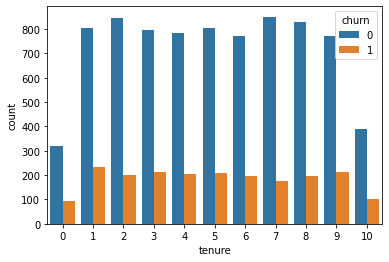

In [104]:
sns.countplot(df['tenure'],hue='churn',data=df)

<AxesSubplot:>

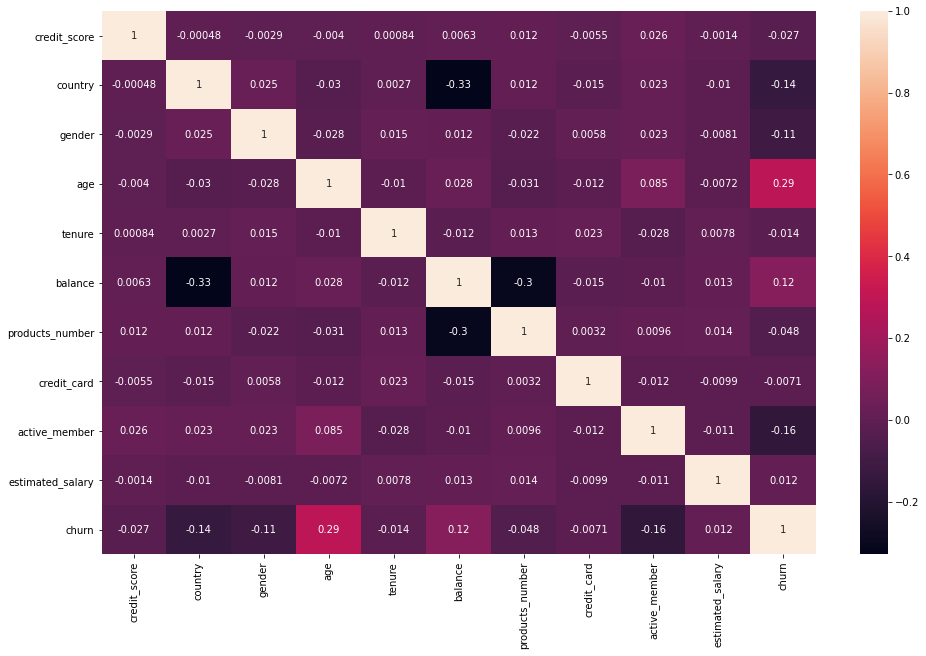

In [105]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), fmt='.2g',annot=True)

# Build Machine Learning Model

In [106]:
x=df.drop(columns=['churn'])
y=df['churn']

In [107]:
x.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,1,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,1,0,42,8,159660.80,3,1,0,113931.57
3,699,1,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [108]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [109]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=2)

In [110]:
Training_Score=[]
Testing_Score=[]

# Decision Tree

In [111]:
model0=DecisionTreeClassifier()

In [112]:
model0.fit(x_train,y_train)

DecisionTreeClassifier()

In [113]:
y_pred=model0.predict(x_test)

In [114]:
y_pred_train=model0.predict(x_train)

In [115]:
a=accuracy_score(y_pred,y_test)*100
print(a)
Testing_Score.append(a)

79.96


In [116]:
b=accuracy_score(y_pred_train,y_train)*100
print(b)
Training_Score.append(b)

100.0


# Random Forest

In [117]:
model1= RandomForestClassifier()

In [118]:
model1.fit(x_train,y_train)

RandomForestClassifier()

In [119]:
y_pred=model1.predict(x_test)

In [120]:
y_pred_train=model1.predict(x_train)

In [121]:
a=accuracy_score(y_pred,y_test)*100
print(a)
Testing_Score.append(a)

86.36


In [122]:
b=accuracy_score(y_pred_train,y_train)*100
print(b)
Training_Score.append(b)

100.0


# Support Vector Machine

In [123]:
model2= SVC()

In [124]:
model2.fit(x_train,y_train)

SVC()

In [125]:
y_pred=model2.predict(x_test)

In [126]:
y_pred_train=model2.predict(x_train)

In [127]:
a=accuracy_score(y_pred,y_test)*100
print(a)
Testing_Score.append(a)

80.60000000000001


In [128]:
b=accuracy_score(y_pred_train,y_train)*100
print(b)
Training_Score.append(b)

79.30666666666667


# XGBoost

In [129]:
model3 = XGBClassifier()

In [130]:
model3.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [131]:
y_pred=model3.predict(x_test)

In [132]:
y_pred_train=model3.predict(x_train)

In [133]:
a=accuracy_score(y_pred,y_test)*100
print(a)
Testing_Score.append(a)

85.64


In [134]:
b=accuracy_score(y_pred_train,y_train)*100
print(b)
Training_Score.append(b)

95.92


In [135]:
Training_Score

[100.0, 100.0, 79.30666666666667, 95.92]

In [137]:
Testing_Score

[79.96, 86.36, 80.60000000000001, 85.64]

In [138]:
models=['Decision Tree','Random Forest','SVM','XGBoost']

In [141]:
df=pd.DataFrame({"Algorithms":models,
                "Training Score":Training_Score,
                "Testing_Score":Testing_Score})

In [142]:
df

,Algorithms,Training Score,Testing_Score
0,Decision Tree,100.000000,79.96
1,Random Forest,100.000000,86.36
2,SVM,79.306667,80.60
3,XGBoost,95.920000,85.64


<AxesSubplot:title={'center':'Performance Visualization of Different Models'}, xlabel='Algorithms'>

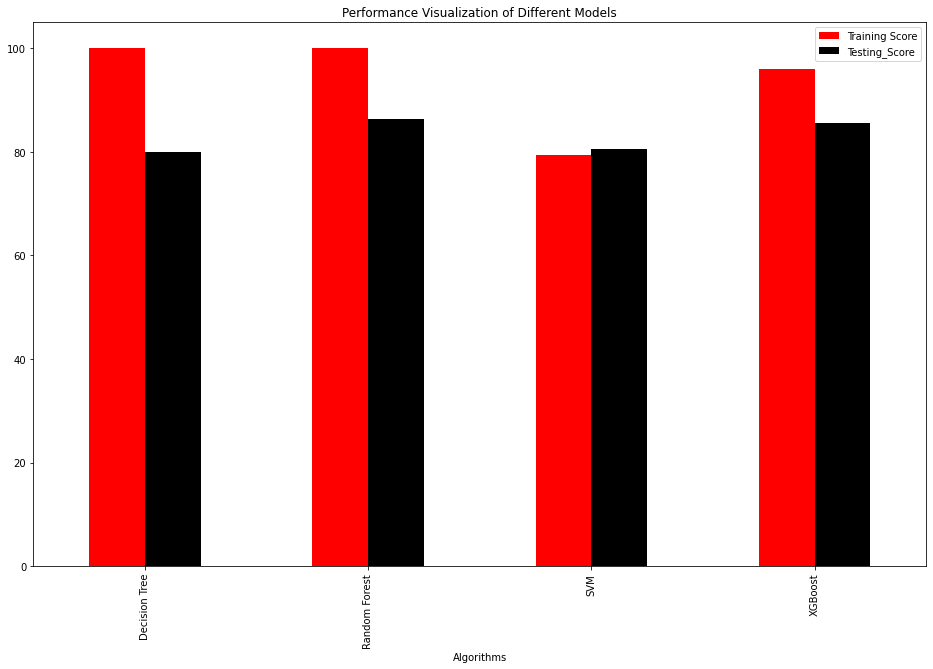

In [147]:
df.plot(x='Algorithms',y=['Training Score','Testing_Score'],figsize=(16,10),kind="bar",title="Performance Visualization of Different Models",colormap="flag")

# Conclusion

We have to change the value in the Country and Gender columns so the Machine Learning model can read and predict the dataset; after changing the value, we have to change the data types on the Country and Gender column from string to integer because XGBoost Machine Learning Model cannot read string data types even though the value in the column is number.

Lastly, XGBoost and Random Forest are the best algorithms to predict Bank Customer Churn since they have the highest accuracy (86,36% and 85.65%). Random Forest and XGBoost have perfect AUC Scores. They have 0.8731 and 0.8600 AUC Scores.